In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(style="ticks")

In [35]:
iris = datasets.load_iris()
# Преобразование данных в DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Замена числовых меток классов на их названия
target_names = {i: name for i, name in enumerate(iris.target_names)}
data['target'] = data['target'].map(target_names)

data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [36]:
x = data.drop('target', axis=1)  # Признаки
y = data['target']               # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=999)

In [37]:
# модель логистической регрессии
logistic_reg = LogisticRegression(random_state=999)
logistic_reg.fit(x_train, y_train)
y_pred_lr = logistic_reg.predict(x_test)

In [38]:
# модель SVM
svm_model = SVC(kernel='linear', random_state=999)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [39]:
# модель дерева решений
tree_model = DecisionTreeClassifier(random_state=999)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

In [40]:
# Оценка качества модели логистической регрессии
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Логистическая регрессия:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-мера:", f1_lr)
print()

# Оценка качества модели SVM
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Модель SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-мера:", f1_svm)
print()

# Оценка качества модели дерева решений
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("Дерево решений:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-мера:", f1_tree)

Логистическая регрессия:
Accuracy: 0.9
Precision: 0.9064935064935064
Recall: 0.9
F1-мера: 0.9016722408026755

Модель SVM:
Accuracy: 0.9666666666666667
Precision: 0.9692307692307692
Recall: 0.9666666666666667
F1-мера: 0.9658181818181819

Дерево решений:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-мера: 0.9333333333333333


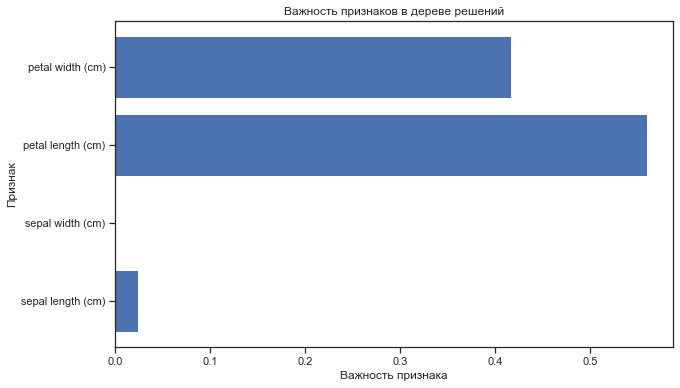

In [41]:
# Получаем важность признаков из модели дерева решений
importances = tree_model.feature_importances_

# Получаем имена признаков
feature_names = data.columns[:-1]

# Создаем график
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в дереве решений')
plt.show()

In [42]:
from sklearn.tree import export_text
feature_names = iris.feature_names
tree_rules = export_text(tree_model, feature_names=feature_names)
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- petal length (cm) <= 3.90
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal length (cm) >  3.90
|   |   |   |   |   |--- class: virginica
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica

